In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Base URL
base_url = 'https://api.biorxiv.org/pub/'
start_date = '2015-01-01'
end_date = '2020-10-31'

In [3]:
# load data
raw = pd.read_json('biorxiv_published_' + start_date + 'to' + end_date + '.json')

# Clean data
1) Remove weird date entries

2) Convert categoreis to all lower case

3) Convert date strings to datetime

In [4]:
# remove weird entries for published date (can try to fix, but currently only 16 entries)
s = raw['published_date'].apply(len)
ind = np.flatnonzero(s != 10)
print(f"{len(ind)} entries removed")
data = raw.drop(raw.index[ind])

17 entries removed


In [5]:
# make all categories lower case
data.preprint_category = data.preprint_category.str.lower()

In [7]:
# convert date columns from strings to datetime
data['published_date'] = pd.to_datetime(data['published_date'],format = '%Y-%m-%d')
data['preprint_date'] = pd.to_datetime(data['preprint_date'],format = '%Y-%m-%d')

### Feature engineering
1) add a 'days_to_publish' column with difference between preprint date and published date

2) add a 'pub_prefix' column to extract the publisher prefix from the doi

In [9]:
# add days to publish column
data['days_to_publish'] = (data['published_date'] - data['preprint_date'])/ pd.to_timedelta(1, unit='D')

# add pub prefix column
data['pub_prefix'] = data.published_doi.str.split('/',expand=True)[0]
data.head(5)

,biorxiv_doi,published_doi,preprint_title,preprint_category,preprint_date,published_date,published_citation_count,days_to_publish,pub_prefix
0,10.1101/007898,10.1016/j.fsigen.2014.09.005,Facile semi-automated forensic body fluid iden...,genomics,2014-08-12,2015-01-01,9,142.0,10.1016
1,10.1101/006742,10.1101/gr.178756.114,Efficient inference of population size histori...,evolutionary biology,2014-06-28,2015-01-06,21,192.0,10.1101
2,10.1101/007922,10.1073/pnas.1413877112,Shadow enhancers enable Hunchback bifunctional...,systems biology,2014-08-13,2015-01-06,18,146.0,10.1073
3,10.1101/006908,10.1093/nar/gku1392,Recurrent alternative splicing isoform switche...,bioinformatics,2014-07-04,2015-01-10,49,190.0,10.1093
4,10.1101/007963,10.1093/bioinformatics/btv002,RNA-Rocket: An RNA-Seq Analysis Resource for I...,bioinformatics,2014-08-14,2015-01-07,8,146.0,10.1093


In [ ]:
# separate neuro data from the rest
neuro_data = data[data['preprint_category']=='neuroscience']

### Plot things

Text(0, 0.5, '# of preprints')

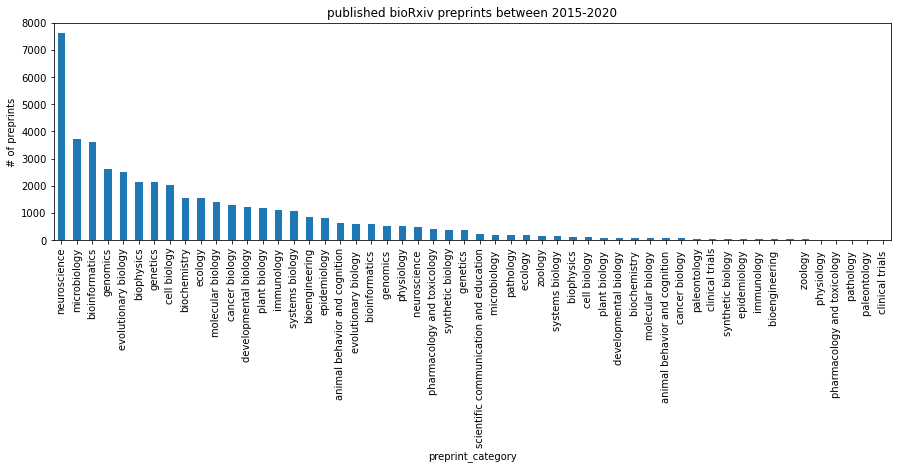

In [10]:
# plot # of preprints published by field
plt.figure(figsize=(15,4))
data.groupby(data.preprint_category).biorxiv_doi.count().sort_values(ascending = False).plot.bar()
plt.title('published bioRxiv preprints between 2015-2020')
plt.ylabel('# of preprints')

Text(0, 0.5, 'days')

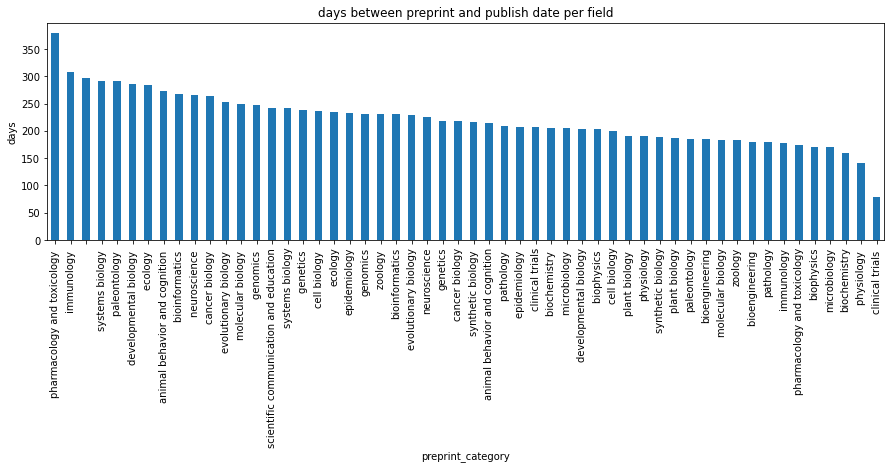

In [11]:
# plot length to publish per field
plt.figure(figsize=(15,4))
data.groupby(data.preprint_category).days_to_publish.mean().sort_values(ascending = False).plot.bar()
plt.title('days between preprint and publish date per field')
plt.ylabel('days')